<a href="https://colab.research.google.com/github/Bee-Chang/Machine-Learning-Projects/blob/main/K_means_clustering_Bermuda_shorts_2_11_2023(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# call the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv("bermuda_shorts.csv")
df.head()


,Unnamed: 0,seqn,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmihead,bmxht,...,bmxarmc,bmiarmc,bmxwaist,bmiwaist,bmxsad1,bmxsad2,bmxsad3,bmxsad4,bmdavsad,bmdsadcm
0,1,62161,1,69.2,NaN,NaN,NaN,NaN,NaN,172.3,...,32.5,NaN,81.0,NaN,17.7,17.9,NaN,NaN,17.8,NaN
1,2,62162,1,12.7,NaN,95.7,NaN,NaN,NaN,94.7,...,16.6,NaN,45.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,62163,1,49.4,NaN,NaN,NaN,NaN,NaN,168.9,...,22.0,NaN,64.6,NaN,15.6,15.5,NaN,NaN,15.6,NaN
3,4,62164,1,67.2,NaN,NaN,NaN,NaN,NaN,170.1,...,29.3,NaN,80.1,NaN,18.3,18.5,NaN,NaN,18.4,NaN
4,5,62165,1,69.1,NaN,NaN,NaN,NaN,NaN,159.4,...,29.7,NaN,86.7,NaN,21.0,20.8,NaN,NaN,20.9,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9338 entries, 0 to 9337
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9338 non-null   int64  
 1   seqn        9338 non-null   int64  
 2   bmdstats    9338 non-null   int64  
 3   bmxwt       9243 non-null   float64
 4   bmiwt       379 non-null    float64
 5   bmxrecum    1079 non-null   float64
 6   bmirecum    31 non-null     float64
 7   bmxhead     236 non-null    float64
 8   bmihead     0 non-null      float64
 9   bmxht       8615 non-null   float64
 10  bmiht       268 non-null    float64
 11  bmxbmi      8602 non-null   float64
 12  bmdbmic     3355 non-null   float64
 13  bmxleg      6955 non-null   float64
 14  bmileg      354 non-null    float64
 15  bmxarml     8826 non-null   float64
 16  bmiarml     369 non-null    float64
 17  bmxarmc     8826 non-null   float64
 18  bmiarmc     373 non-null    float64
 19  bmxwaist    8204 non-null  

In [ ]:
print(df.shape)

(9338, 27)


Per problem description, we need waist circumference (bmxwaist column) and upper leg length(bmxleg). We come to know the total row number (9338) and find many missing values in both columns, we need to clean them.

In [ ]:
df.isnull().sum()

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

We see that bmxleg column has 2383 missing values and bmxwaist column has 1134 missing values.

In [ ]:
#remove the missing values with NaNs
df=df.dropna(subset=['bmxleg','bmxwaist'])
print(df.shape)

(6899, 27)


After removing the missing values, we now have 6899 rows.

Text(0, 0.5, 'waist circumference (cm)')

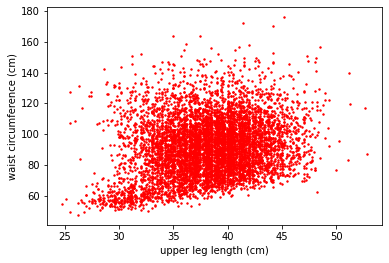

In [ ]:
#scatter plot
plt.scatter(df['bmxleg'],df['bmxwaist'], c='red', s=2)
plt.xlabel("upper leg length (cm)")
plt.ylabel("waist circumference (cm)")


In [ ]:
#For now, we'll try k value 2
k=2
X=np.array(list(zip(df['bmxleg'], df['bmxwaist'])))
model=KMeans(n_clusters=k)
kmeans=model.fit(X)
labels=model.predict(X)
centroids=model.cluster_centers_

print(labels)
print(centroids)


[0 0 0 ... 0 1 0]
[[ 37.65540467  77.85152091]
 [ 38.82082686 107.92881567]]


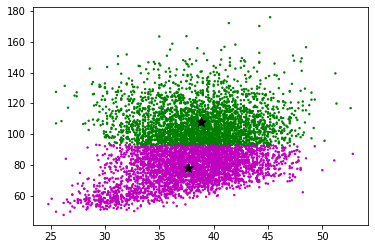

In [ ]:
#Plot the data and centroids on a scatter plot
#map the labels to colors

c=['m','g','b','r','y','c']
colors=[c[i] for i in labels]

plt.scatter(df['bmxleg'], df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')

Based on the result, we come to the following two sizes:

waist 108.0 cm, upper leg length 38.8 cm

waist 77.9 cm, upper leg length 37.7 cm

In [ ]:
#Using the model that you have just trained, 
#you can use it to predict what cluster for any data pt

cluster=model.predict([[35,123]])[0]
print(c[cluster])


g


In [ ]:
#To determine the silhouette coefficient/score

from sklearn.metrics import silhouette_score

model=KMeans(n_clusters=2)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=2): {silhouette_score(X,label)}')


model=KMeans(n_clusters=3)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=3): {silhouette_score(X,label)}')


model=KMeans(n_clusters=4)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=4): {silhouette_score(X,label)}')


silhouette Score (n=2): 0.5165351076055341
silhouette Score (n=3): 0.47226905068761915
silhouette Score (n=4): 0.43588828315547523


The highest value is n=2, so the ideal cluster# is 2.

But, what if the management forces this to four (or some) sizes for revenue generation purpose? But just two size of shorts will not be good for business, so the management asks for four sizes (n=4).

[[ 36.05079038  67.3375945 ]
 [ 38.88910802 102.30811295]
 [ 38.58335247 124.252124  ]
 [ 38.73279249  85.14393681]]


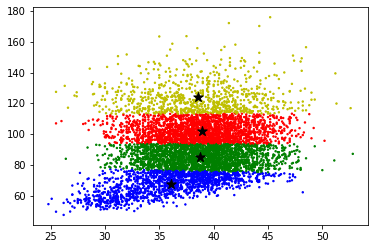

In [ ]:
k=4
X=np.array(list(zip(df['bmxleg'],df['bmxwaist'])))

kmeans=KMeans(n_clusters=k)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)
centroids=kmeans.cluster_centers_

#map the labels to colors
c=['b','r','y','g','c','m']
colors=[c[i] for i in labels]

plt.scatter(df['bmxleg'],df['bmxwaist'],c=colors,s=2)
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=100,c='black')

print(centroids)


By forcing this to four sizes, we come to the following sizes:

Waist 101.94cm, upper leg length 38. - (40inches, 15inches) LARGE size

Waist 84.66cm, upper leg length 38.7cm - (33inches, 15inches) MEDIUM size

Waist 124.0cm, upper leg length 38.59cm - (49inches, 15inches) XLARGE size

Waist 66.97cm, upper leg length 35.94cm - (26inches, 14inches) SMALL size
